In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
check_result_df = pd.read_csv('/opt/level2_klue-nlp-03/results/stratify_test/val_result.csv')
check_result_df['correct'] = check_result_df['target'] == check_result_df['predict']

In [45]:
check_result_df.columns

Index(['sentence', 'tokenized', 'target', 'predict', 'correct'], dtype='object')

In [46]:
check_result_df.head()

,sentence,tokenized,target,predict,correct
0,미쓰라 진을 제외하고 타블로는 아내 강혜정의 출산으로 인해 5월 초까지 휴식을 가졌다.,[CLS] 강혜정 [SEP] 타블로 [SEP] 미쓰라 진을 제외하고 타블로는 아내 ...,per:spouse,per:spouse,True
1,1959년 1월 베트남 공산당은 하노이에서 제15차 전체회의를 개최하였다.,[CLS] 베트남 [SEP] 하노이 [SEP] 1959년 1월 베트남 공산당은 하노...,no_relation,org:place_of_headquarters,False
2,베네딕토 16세는 시복 선언문 낭독을 마치고 앰풀에 담긴 요한 바오로 2세의 혈액을...,[CLS] 베네딕토 16세 [SEP] 요한 바오로 2세 [SEP] 베네딕토 16세는...,no_relation,no_relation,True
3,까마귀의 향연(A Feast for Crows)은 조지 R. R. 마틴의 얼음과 불...,[CLS] 조지 R. R. 마틴 [SEP] 얼음과 불의 노래 [SEP] 까마귀의 향...,per:product,per:product,True
4,시로스카이는 서울특별시에서 탤런트 윤성국의 2녀 중 막내로 태어났다.,[CLS] 시로스카이 [SEP] 서울특별시 [SEP] 시로스카이는 서울특별시에서 탤...,no_relation,per:place_of_birth,False


## 레이블별 정답률 확인

In [47]:
# 레이블별 정답률 확인
label_stats = pd.DataFrame()
label_counts = check_result_df.groupby('target')['predict'].count()
correct_counts = check_result_df.groupby('target')['predict'].apply(lambda x: (x == x.name).sum())
label_stats['total'] = label_counts
label_stats['correct'] = correct_counts
label_stats['correct_ratio'] = label_stats['correct'] / label_stats['total']
label_stats

,total,correct,correct_ratio
target,,,
no_relation,953,677,0.710388
org:alternate_names,132,117,0.886364
org:dissolved,7,5,0.714286
org:founded,45,44,0.977778
org:founded_by,16,13,0.812500
org:member_of,187,151,0.807487
org:members,42,18,0.428571
org:number_of_employees/members,5,2,0.400000
org:place_of_headquarters,119,100,0.840336


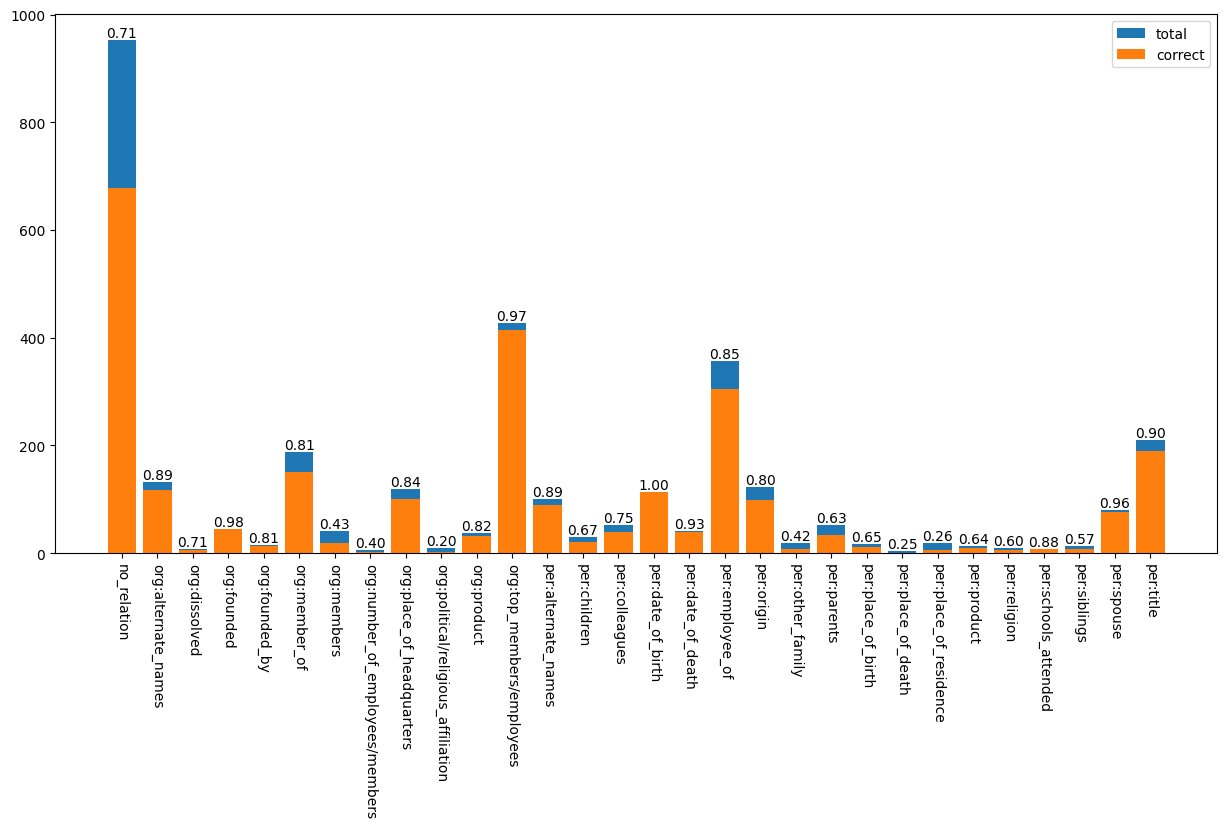

In [48]:
# 레이블 별 총 데이터 개수와 정답 데이터 개수 비교
plt.figure(figsize = (15, 7))
plt.bar(label_stats.index, label_stats['total'], label="total")
plt.bar(label_stats.index, label_stats['correct'], label="correct")
for i in range(len(label_stats)):
    plt.text(label_stats.index[i], label_stats['total'][i], f"{label_stats['correct_ratio'][i]:.2f}", ha='center', va='bottom')
plt.legend()
plt.xticks(rotation=-90)
plt.show()

## HEATMAP으로 체크

In [49]:
df = check_result_df[['target','predict']]
labels = list(label_stats.index)

new_df = pd.DataFrame()#columns=labels,index=labels)
# new_df.fillna(0,inplace=True)

for trgt in labels:
    temp_lst = []
    for pred in labels:
        count = len(df[(df['target'] == trgt) & (df['predict'] == pred)])
        temp_lst.append(count)
    new_df[trgt] = temp_lst
new_df.columns = labels
new_df['predict'] = labels
new_df.set_index('predict',inplace=True)
# new_df.reset_index(inplace=True,drop=True)#labels,inplace=True)
new_df

,no_relation,org:alternate_names,org:dissolved,org:founded,org:founded_by,org:member_of,org:members,org:number_of_employees/members,org:place_of_headquarters,org:political/religious_affiliation,...,per:parents,per:place_of_birth,per:place_of_death,per:place_of_residence,per:product,per:religion,per:schools_attended,per:siblings,per:spouse,per:title
predict,,,,,,,,,,,,,,,,,,,,,
no_relation,677,7,2,1,0,21,11,3,11,6,...,6,0,1,3,4,3,0,1,1,14
org:alternate_names,6,117,0,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
org:dissolved,3,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
org:founded,10,0,0,44,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
org:founded_by,0,0,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
org:member_of,60,1,0,0,1,151,3,0,3,0,...,0,0,0,0,0,0,0,0,0,0
org:members,12,4,0,0,0,1,18,0,5,1,...,0,0,0,0,0,0,0,0,0,0
org:number_of_employees/members,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
org:place_of_headquarters,23,1,0,0,0,9,6,0,100,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
new_df.sum()

no_relation                            953
org:alternate_names                    132
org:dissolved                            7
org:founded                             45
org:founded_by                          16
org:member_of                          187
org:members                             42
org:number_of_employees/members          5
org:place_of_headquarters              119
org:political/religious_affiliation     10
org:product                             38
org:top_members/employees              428
per:alternate_names                    100
per:children                            30
per:colleagues                          53
per:date_of_birth                      113
per:date_of_death                       42
per:employee_of                        357
per:origin                             123
per:other_family                        19
per:parents                             52
per:place_of_birth                      17
per:place_of_death                       4
per:place_o

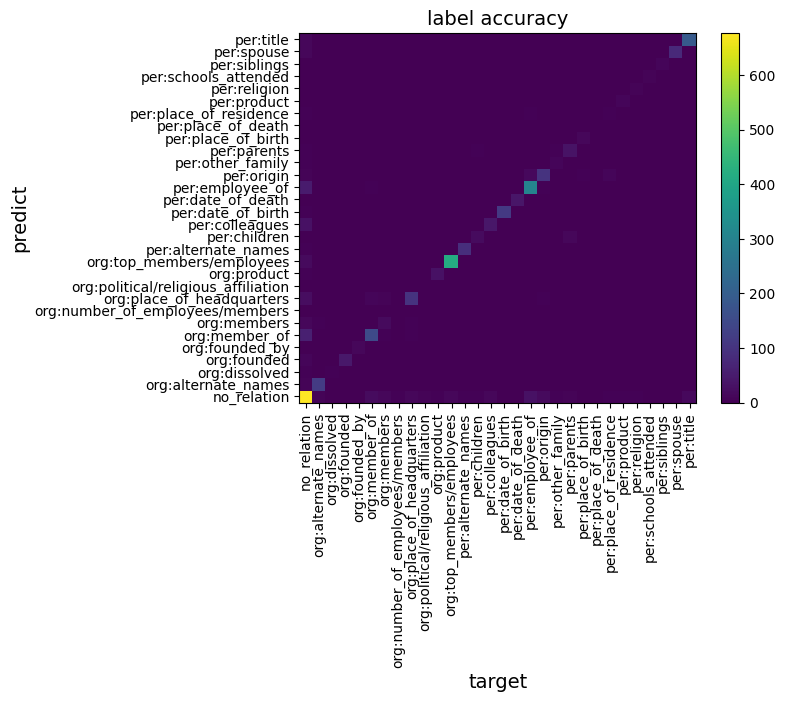

In [51]:
# dataset normalize안하고 heatmap 

labels = list(label_stats.index)

plt.pcolor(new_df)
plt.xticks(np.arange(0.5, len(labels), 1), labels)
plt.xticks(rotation=90)
plt.yticks(np.arange(0.5, len(labels), 1), labels)

plt.title('label accuracy', fontsize=14)
plt.xlabel('target', fontsize=14)
plt.ylabel('predict', fontsize=14)
plt.colorbar()

plt.show()

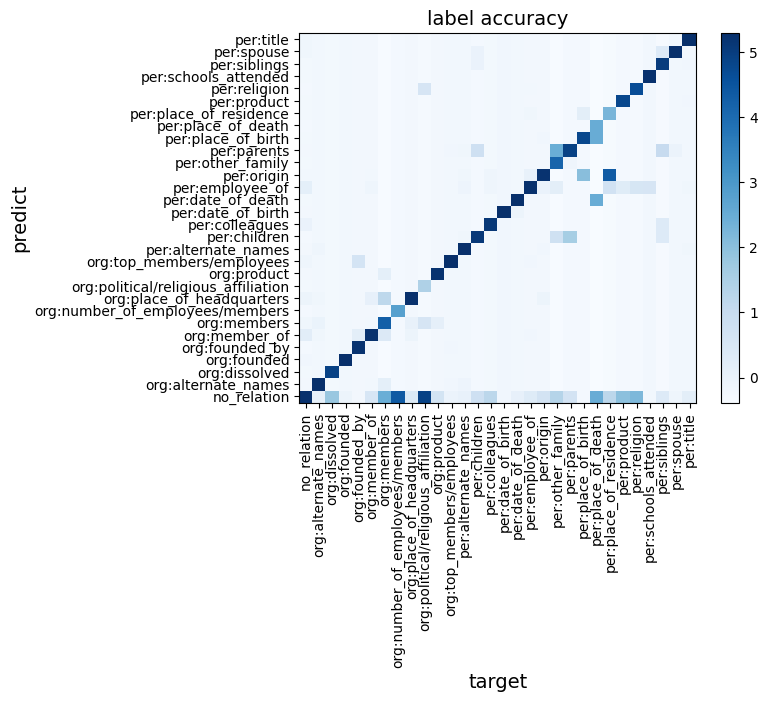

In [52]:
# dataset normalize 하고 heatmap 

labels = list(label_stats.index)

normalization_df = (new_df - new_df.mean())/new_df.std()
normalization_df.head()

plt.pcolor(normalization_df,cmap='Blues')

plt.xticks(np.arange(0.5, len(labels), 1), labels)
plt.xticks(rotation=90)
plt.yticks(np.arange(0.5, len(labels), 1), labels)

plt.title('label accuracy', fontsize=14)
plt.xlabel('target', fontsize=14)
plt.ylabel('predict', fontsize=14)

plt.colorbar()

plt.show()

## 💡 결론
- klue/bert-base 10 epoch (no earlystop)
- 전반적으로 잘 맞추는데 per:place_of_residence, per:product, org:product를 잘 못맞추는 경향